In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
import datetime
import datetime
import seaborn as sns
warnings.simplefilter("ignore")

# Chargement des fichiers dans les DataFrame

In [2]:
df_customers = pd.read_csv(r'customers.csv')
df_products = pd.read_csv(r'products.csv')
df_transactions = pd.read_csv(r'transactions.csv')

## 1/ Analyse des données DataFrame

### Dataframe df_customers

In [3]:
#Erreur de types
print("Vérification des types : ")
print(df_customers.dtypes)

#Vérification des Valeurs manquantes
print("Vérification des valeures manquantes : ")
print(df_customers.isnull().sum())

#Vérification des doublons :
doublon = df_customers.loc[df_customers[['client_id', 'sex', 'birth']].duplicated(keep=False),:]
print(doublon)


#Vérication outliers: 

print(df_customers.describe())


Vérification des types : 
client_id    object
sex          object
birth         int64
dtype: object
Vérification des valeures manquantes : 
client_id    0
sex          0
birth        0
dtype: int64
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000


**Analyse :**<br>
Nous pouvons voir que la vérification des types est bonne <br>
Il n'y a pas de valeures manques<br>
Il n'y a pas de doublons non plus<br>
Il ne semble pas avoir d'ouliers<br>

### Dataframe df_products

In [4]:
#Erreur de types
print("Vérification des types : ")
print(df_products.dtypes)

#Vérification des Valeurs manquantes
print("Vérification des valeures manquantes : ")
print(df_products.isnull().sum())

#Vérification des doublons :
doublon = df_products.loc[df_products[['id_prod', 'price', 'categ']].duplicated(keep=False),:]
print(doublon)


#Vérication outliers: 

print(df_products.describe())


Vérification des types : 
id_prod     object
price      float64
categ        int64
dtype: object
Vérification des valeures manquantes : 
id_prod    0
price      0
categ      0
dtype: int64
Empty DataFrame
Columns: [id_prod, price, categ]
Index: []
             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000


**Analyse :**<br>
Nous pouvons voir que la vérification des types est bonne<br>
Il n'y a pas de valeures manques<br>
Il n'y a pas de doublons non plus<br>
Il ne semble pas avoir d'ouliers<br>

### Dataframe df_transactions

In [5]:
#Erreur de types
print("Vérification des types : ")
print(df_transactions.dtypes)

#Vérification des Valeurs manquantes
print("Vérification des valeures manquantes : ")
print(df_transactions.isnull().sum())

#Vérification des doublons :
doublon = df_transactions.loc[df_transactions[['id_prod','session_id','client_id']].duplicated(keep=False),:]
print(doublon)


#Vérication outliers: 

print(df_transactions.describe())

Vérification des types : 
id_prod       object
date          object
session_id    object
client_id     object
dtype: object
Vérification des valeures manquantes : 
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
       id_prod                             date session_id client_id
582     0_1123       2021-04-29 21:21:22.708928    s_27641    c_4459
889     0_1335       2023-02-01 18:55:40.983876   s_335537    c_4561
1193    0_1424       2021-03-20 05:24:33.132965     s_8842    c_4595
1278     1_397       2022-05-17 05:45:19.203870   s_209799     c_915
1292    0_1361       2022-04-24 20:56:36.206670   s_198937    c_1784
...        ...                              ...        ...       ...
677618  0_1561       2021-06-21 05:30:53.999603    s_51611    c_8596
678160  0_2267       2021-04-01 04:30:02.545268    s_14298    c_7526
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1
679356   1_459       2021-12-14 10:10:02.741338   s_134184     c_120


**Analyse :**<br>
Le format de la date n'est pas bon<br>
Il n'y a pas de valeures manques<br>
Il y a plusieurs doublons dans la dataframe<br>

Il semble y avoir une valeur de date qui n'est pas correcte avec un "Test"<br>

In [6]:
#On commence par supprimer les valeurs 'Test' de notre dataframe

#Création d'une dataframe avec les dates qui contiennent 'test'
test = df_transactions.loc[df_transactions['date'].str[0:4]=='test',:]
#Suppression des dates qui contiennent 'test'
df_transactions.drop(test.index, inplace = True)

In [7]:
#Creation d'une nouvelle date plus 'simple'
df_transactions['new_date'] = df_transactions['date'].str[0:10]
#Mise au bon format de la news date
df_transactions['new_date'] = pd.to_datetime(df_transactions['new_date'], 
                                        format='%Y-%m-%d', errors='coerce')
#Mise au bon format 'date' des deux dates
df_transactions['date'] = pd.to_datetime(df_transactions['date'], 
                                        format='%Y-%m-%d', errors='coerce')
print("Vérification des types : ")
print(df_transactions.dtypes)

Vérification des types : 
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
new_date      datetime64[ns]
dtype: object


In [8]:
#Création d'une dataframe avec les doublons de 'id_prod', 'session_id', 'client_id'
doublon = df_transactions.loc[df_transactions[['id_prod', 'new_date','session_id','client_id']].duplicated(),:]
doublon
#Suppression de la dataframe doublon dans la dataframe transactions.
df_transactions.drop(doublon.index, inplace = True)
#Réindexation de la dataframe
df_transactions = df_transactions.reset_index()
df_transactions

,index,id_prod,date,session_id,client_id,new_date
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11
...,...,...,...,...,...,...
678507,679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15
678508,679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19
678509,679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20
678510,679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16


In [9]:
#Création d'une dataframe avec les doublons de 'id_prod', 'session_id', 'client_id'
doublon2 = df_transactions.loc[df_transactions[['id_prod','session_id','client_id']].duplicated(),:]
print(doublon2)

#Si nous enlevons la date, nous pouvons voir que nous avons des doublons. Cela est du a une reprise de session d'un client
#après minuit. Ce sont donc bien des doublons à enlever

#Suppression de la dataframe doublon dans la dataframe transactions.
df_transactions.drop(doublon2.index, inplace = True)
#Réindexation de la dataframe
df_transactions = df_transactions.reset_index()


         index id_prod                       date session_id client_id  \
290656  290902  0_1579 2021-10-10 00:35:12.599474   s_102502    c_4153   
320360  320653  0_1072 2022-02-24 00:17:43.601722   s_169886    c_6664   
465379  465908  0_1419 2021-05-15 00:24:37.439355    s_34614    c_2997   
518558  519198  0_1450 2022-01-12 00:13:38.964714   s_148475    c_6407   
561528  562261   1_724 2021-09-15 23:50:35.021114    s_90517    c_6714   
618603  619473  0_2058 2021-09-17 23:33:49.984972    s_91490    c_4804   
661289  662257   2_185 2021-05-01 00:20:24.972589    s_28171    c_5848   

         new_date  
290656 2021-10-10  
320360 2022-02-24  
465379 2021-05-15  
518558 2022-01-12  
561528 2021-09-15  
618603 2021-09-17  
661289 2021-05-01  


In [10]:
df_transactions = df_transactions.drop(columns =['level_0','index'], axis = 1)
df_transactions.reset_index()
df_transactions

,id_prod,date,session_id,client_id,new_date
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11
...,...,...,...,...,...
678500,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15
678501,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19
678502,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20
678503,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16


## Liaison des trois tables et vérification

In [11]:
#Liaison de la df_transactions et df_products
df_fusion = pd.merge(df_transactions,df_products, on=['id_prod'], how ='left')
#Liaison de la dataframe crée juste avant et de la df_customers
df_conso = pd.merge(df_fusion,df_customers, on=['client_id'], how ='left')
#Nouvelle dataframe qui comporte tous les champs dont on a besoin et qui se nomme : df_conso
df_conso

,id_prod,date,session_id,client_id,new_date,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...,...
678500,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,12.99,0.0,f,1951
678501,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,10.99,1.0,f,1977
678502,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,12.99,0.0,f,1988
678503,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,4.98,0.0,m,1986


In [12]:
#Erreur de types
print("Vérification des types : ")
print(df_conso.dtypes)

#Vérification des Valeurs manquantes
print("Vérification des valeures manquantes : ")
print(df_conso.isnull().sum())

#Vérification des doublons :
doublon = df_conso.loc[df_conso[['id_prod', 'client_id', 'session_id']].duplicated(keep=False),:]
print("Vérification des doublons : ")
print(doublon)


#Vérication outliers: 

print(df_conso.describe())

Vérification des types : 
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
new_date      datetime64[ns]
price                float64
categ                float64
sex                   object
birth                  int64
dtype: object
Vérification des valeures manquantes : 
id_prod         0
date            0
session_id      0
client_id       0
new_date        0
price         221
categ         221
sex             0
birth           0
dtype: int64
Vérification des doublons : 
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, new_date, price, categ, sex, birth]
Index: []
               price          categ          birth
count  678284.000000  678284.000000  678505.000000
mean       17.450650       0.441787    1977.808538
std        18.324117       0.594888      13.574454
min         0.620000       0.000000    1929.000000
25%         8.870000       0.000000    1970.000000
50%        13.990000       0.000000    

**Analyse :**<br>
Nous pouvons voir qu'après fusion des diffèrentes DataFrame nous avons 221 valeurs manquantes <br>
Et que la colonne 'catég' est devenu un 'float' au lieu d'un 'int'<br>
Nous allons donc les enlever et changer le format de 'catég'<br>

In [13]:
#Création de la dataframe avec les valeurs null qui se trouve dans la colonne 'categ'
df_null = df_conso.loc[df_conso['categ'].isnull(),['id_prod']]
#Suppression dans df_conso de la dataframe df_null creer juste avant.
df_conso.drop(df_null.index, inplace = True)
df_conso = df_conso.reset_index()
df_conso

,index,id_prod,date,session_id,client_id,new_date,price,categ,sex,birth
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,4.18,0.0,f,1986
1,1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,15.99,1.0,m,1988
2,2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,7.99,0.0,f,1968
3,3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,69.99,2.0,m,2000
4,4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...,...,...
678279,678500,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,12.99,0.0,f,1951
678280,678501,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,10.99,1.0,f,1977
678281,678502,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,12.99,0.0,f,1988
678282,678503,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,4.98,0.0,m,1986


In [14]:
#Changement de format de 'catég'  qui passe d'une valeur décimal à entier
df_conso['categ']= df_conso['categ'].astype(int)

In [15]:
#Erreur de types
print("Vérification des types : ")
print(df_conso.dtypes)

#Vérification des Valeurs manquantes
print("Vérification des valeures manquantes : ")
print(df_conso.isnull().sum())

#Vérification des doublons :
doublon = df_conso.loc[df_conso[['id_prod', 'client_id', 'session_id']].duplicated(keep=False),:]
print("Vérification des doublons : ")
print(doublon)


#Vérication outliers: 

print(df_conso.describe())

Vérification des types : 
index                  int64
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
new_date      datetime64[ns]
price                float64
categ                  int32
sex                   object
birth                  int64
dtype: object
Vérification des valeures manquantes : 
index         0
id_prod       0
date          0
session_id    0
client_id     0
new_date      0
price         0
categ         0
sex           0
birth         0
dtype: int64
Vérification des doublons : 
Empty DataFrame
Columns: [index, id_prod, date, session_id, client_id, new_date, price, categ, sex, birth]
Index: []
               index          price          categ          birth
count  678284.000000  678284.000000  678284.000000  678284.000000
mean   339243.586840      17.450650       0.441787    1977.808546
std    195866.188269      18.324117       0.594888      13.575262
min         0.000000       0.620000       0.000

**Analyse :**<br>
Nous pouvons constater que nous n'avons plus d'anomalie dans notre dataframe conso<br>
Nous pouvons ainsi commencer notre analyse

# 2/ Analyse du CA

In [16]:
#Somme des prix pour avoir le CA total
CA = df_conso['price'].sum()
print("Le chiffre d'affaire total est de : ", '{0:,}'.format(round(CA,2)) , " €")

Le chiffre d'affaire total est de :  11,836,496.99  €


### 2.1 Analyse CA par Catégorie

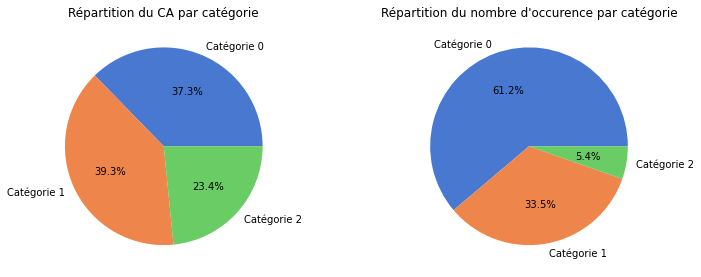

Le nombre de client total est de :  8600  clients


In [17]:
#Calcule du nombre de clients
nb = df_conso[['client_id']]
nb = nb.drop_duplicates()
nb_client = nb['client_id'].count()
#Creation du dataframe pour l'analyse du CA (somme des catégorie)
df_price_categ = df_conso.groupby('categ').sum()
#Creation du dataframe pour l'analyse du CA (nombre d'occurence)
grpby_categ1 = df_conso.groupby('categ').count()


#Creation du graphique
plt.figure(figsize=(12, 10))
#Graphique 1
plt.subplot(2,2,1)
plt.title("Répartition du CA par catégorie")
plt.pie(df_price_categ['price'],colors = sns.color_palette('muted'),labels =['Catégorie 0','Catégorie 1','Catégorie 2'], autopct="%1.1f%%")

#Graphique 2
plt.subplot(2,2,2)
plt.title("Répartition du nombre d'occurence par catégorie")
plt.pie(grpby_categ1['price'],colors = sns.color_palette('muted'),labels =['Catégorie 0','Catégorie 1','Catégorie 2'], autopct="%1.1f%%")

plt.show()

print("Le nombre de client total est de : ", nb_client, " clients")

**Analyse :**<br>
Nous pouvons voir que le chiffre d'affaire est plus repartie sur la catégorie 0 et 1 qui reprensent 76.6% du total<br>
Nous pouvons voir également que l'on a beaucoup de commande sur la catégorie 0 mais quelle n'est pas la premiere catégorie en terme de CA


### 2.2 Analyse de la repartition des clients par sexe

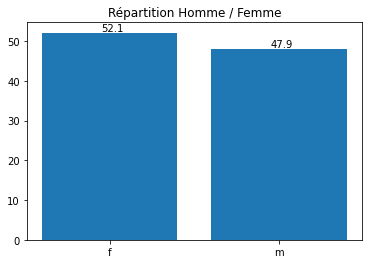

In [18]:
df_HF = df_conso[['client_id','sex']]
df_HF = df_HF.drop_duplicates()

df_HF = df_HF.groupby('sex').count()
df_HF['Part'] = round(df_HF['client_id']/nb_client*100,1)
df_HF = df_HF.drop("client_id", axis='columns')
df_HF = df_HF.reset_index()

x = df_HF['sex'].values
y = df_HF['Part'].values

plt.bar(x, y)
plt.title("Répartition Homme / Femme")
for index, value in enumerate(y):
    plt.text(index-0.05, value+0.5,str(value))
plt.show()

### 2.3  Analyse du CA par sexe

categ       0       1      2
sex                         
f      205851  114759  17256
m      209159  112132  19127


Text(0.5, 1.0, 'Genre Vs Catégorie')

<Figure size 432x288 with 0 Axes>

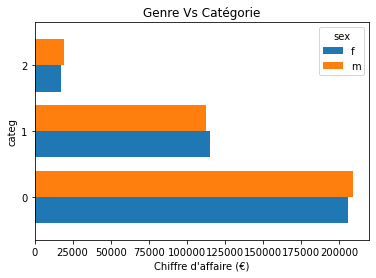

In [19]:
df_sex_categ = pd.crosstab(df_conso['sex'], df_conso['categ'])
print(df_sex_categ)
fig = plt.figure()
df_sex_categ.T.plot(kind='barh', ylabel='frequence', width =0.8)
plt.xlabel("Chiffre d'affaire (€)")
plt.title('Genre Vs Catégorie')

### 2.4  Analyse Chronologique du CA

Text(0, 0.5, "Chiffre d'affaire (€)")

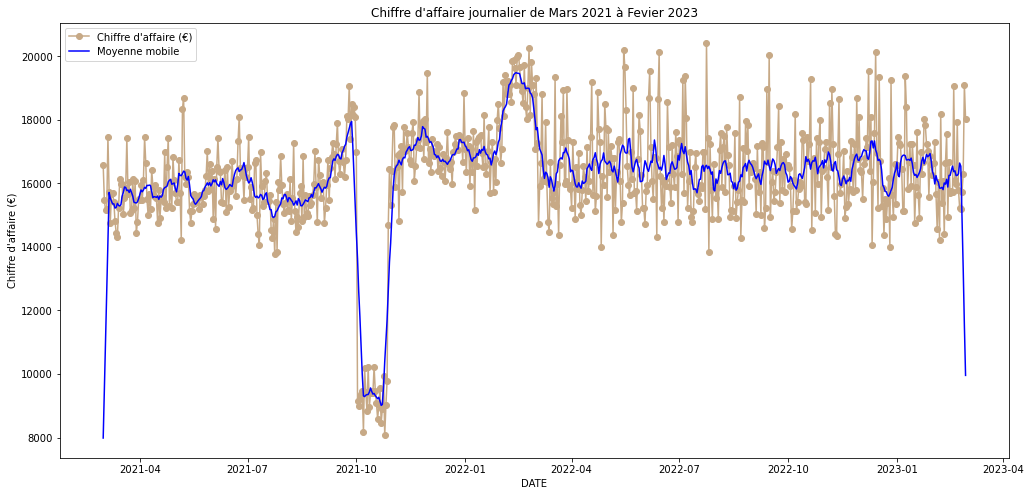

In [42]:
df_evol = df_conso[['new_date','price']]
df_evol = df_evol.groupby('new_date').sum()
df_evol = df_evol.sort_values(by=['new_date'])
df_evol = df_evol.reset_index()

def mvg_vrg(i, w): #Calcule de la moyenne mobile
    window= np.ones(int(w))/float(w)
    return np.convolve(i, window, 'same')

fig, axe = plt.subplots(figsize=(17,8))
x= df_evol.iloc[:,0]
y= df_evol.iloc[:,1]
y_av = mvg_vrg(y,10)

axe.plot(x, y, color='#C7A986', marker='o', label="Chiffre d'affaire (€)")
axe.plot(x, y_av,"b", label = "Moyenne mobile") #affichage de la moyenne mobile

axe.set_title("Chiffre d'affaire journalier de Mars 2021 à Fevier 2023")
axe.legend()
axe.set_xlabel("DATE")
axe.set_ylabel("Chiffre d'affaire (€)")

**Analyse : ** <br>
- Nous pouvons constater que le CA reste majoritairement compris entre 14k et 20k environ sur l'ensemble de la période
- Sauf sur une période où l'on peut constater que le chiffre d'affaire est compris entre 8k et 10k d'octobre 2021

In [21]:
#Les top flop CA des produits

top_flop =  df_conso[['id_prod','price']]
top_flop = top_flop.groupby('id_prod').sum()
top_flop = top_flop.sort_values(by=['price'])
top_flop = top_flop.reset_index()

top = top_flop.tail(10)
flop = top_flop.head(10)

print("Les top produits en CA : ")
print(top)
print("Les flop produits en CA : ")
print(flop)

Les top produits en CA : 
     id_prod     price
3255   2_166  52449.12
3256    2_39  53060.85
3257   2_110  53846.25
3258   1_369  53857.55
3259   1_395  54298.27
3260   2_209  56971.86
3261   2_102  60618.50
3262   2_112  64867.20
3263   2_135  68576.06
3264   2_159  94747.51
Les flop produits en CA : 
  id_prod  price
0  0_1539   0.99
1  0_1284   1.38
2  0_1653   1.98
3  0_1601   1.99
4   0_807   1.99
5   0_541   1.99
6  0_1728   2.27
7  0_1498   2.48
8   0_898   2.54
9  0_1840   2.56


### Courbe de lorenz et Z_score

In [23]:
#Création d'une dataframe avec le CA part session (nommé df_CA)

df_CA = df_conso[['session_id','price']] 
df_CA = df_CA.sort_values('session_id')
df_CA = df_CA.groupby('session_id').sum()

In [24]:
threshold = 2 #seuil
mean = np.mean(df_CA.price) #Calcule de la moyenne
print("La moyenne est de : ", round(mean,2))
std = np.std(df_CA.price) #Calcule de l'ecart-type empirique
print("L'écart-type est de : ", round(std,2))

#Vérification si le z-score de chaque prix est au dessus du seuil et on ne garde que les résultats positifs
z_score_outlier = [i for i in df_conso.price if (i-mean)/std > threshold]
z_score_outlier.sort() #Tri par ordre croissant

#La liste des outliers Z-score
#print("La liste des outliers : ", z_score_outlier)
#Nombre d'outliers avec le Z_score
print("Nombre de outliers dans la liste : ", len(z_score_outlier))


#Calcule du seuil de prix au-dessus duquel une donnée est un outliers avec le Z-score
#(x-mean)/std = 2
#x-mean = 2*std
#x = 2*std + mean
seuil_outliers = 2*std + mean
print("Le seuil pour qu'une valeur soit un outlier est de : ", round(seuil_outliers,2))


La moyenne est de :  34.58
L'écart-type est de :  32.5
Nombre de outliers dans la liste :  6939
Le seuil pour qu'une valeur soit un outlier est de :  99.58


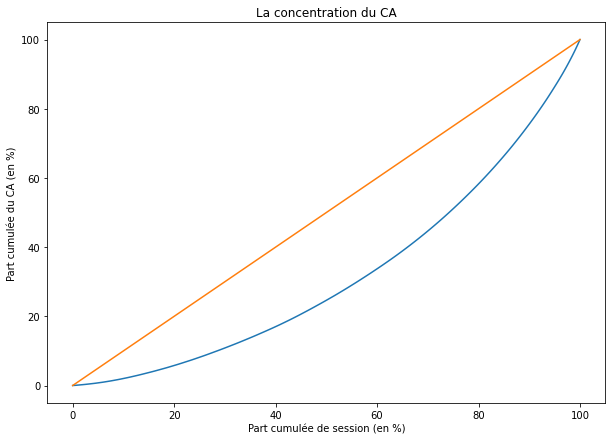

In [25]:
fig = plt.figure(1, figsize = (10,7))
depenses = df_CA[df_CA['price']<99.58]
dep = depenses['price'].values #On selectionne exclusivement la valeur qui nous interesse ici le prix
n = len(dep) #On compte le nombre d'élément de la serie
lorenz = (np.cumsum(np.sort(dep)) / dep.sum())*100 # 'np.cumsum(np.sort(dep))' somme cumulée et trié de 'dep' divisé par la somme des 'dep'
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = (np.linspace(0-1/n,1+1/n,len(lorenz)))*100 #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,100], [0,100]) #tracer la bisséctrice
plt.title("La concentration du CA")
plt.xlabel("Part cumulée de session (en %)")
plt.ylabel("Part cumulée du CA (en %)")
plt.show()



In [26]:
def G(v):
    bins = np.linspace(0., 100., 54)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # Calcule de l'air pour une concentration parfaite
    pe_area = np.trapz(bins, x=bins)
    # Calcul de l'air sous la courbe de lorenz
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area) #L'aire total du triangle - l'aire en dessous de la courbe de lorenz / l'aire total
    return bins, yvals, gini_val

bins, result, gini_val = G(lorenz)
print("GINI: %.2f" %(gini_val))


GINI: 0.48


**Analyse :** <br>
- La distribution est inégalitaire
- Plus le prix augmente plus la distance entre les deux courbes augmentent
- Plus le prix augmente moins il y a des dépenses
- L'indice de GINI est 0.48 (indice compris en 0 (égalité parfaite) et 1 (inégalité extreme), l'inégalité est d'autant plus forte que le coefficient de GINI est élevé)

In [27]:
nb = df_conso[['client_id']]
nb = nb.drop_duplicates()
nb_client = nb['client_id'].count()

print("Nombre total de client : ",nb_client, " personnes")

Nombre total de client :  8600  personnes


In [28]:
# Skewness empirique (Coefficient d'asymetrie par rapport à la distribution normale)
print('Le coefficient de Skewness est de : ', df_conso['price'].skew())
#Kurtosis empirique (Coefficient d'aplatissement par rapport à la distribution normale)
print('Le coefficient de Kurtosis est de : ', df_conso['price'].kurtosis())

Le coefficient de Skewness est de :  5.391176655135526
Le coefficient de Kurtosis est de :  43.07426735366197


**Analyse :** <br>
- Puisque la valeur du coefficient de Skewness est positive, nous interprétons cela comme signifiant que la distribution du prix est asymetrique à droite, ce qui signifie que la queue s'étend du côté droit de la distribution <br>
- Puisque la valeur du coefficient de Kurtosis est élèvée, cela nous indique que la distribution est plutôt pointu

# TEST STATISTIQUE

In [29]:
# Création de la variable 'Age' qui sera l'année du jour - l'année de la date d'anniversaire du client
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = int(date.strftime("%Y"))
df_conso['age'] = year - df_conso['birth']

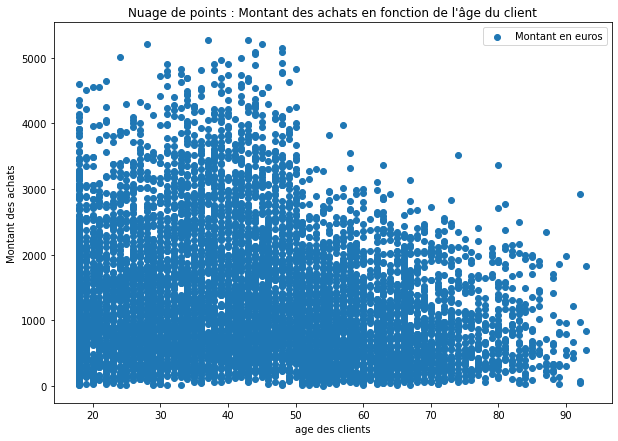

In [30]:
df_montant_age = df_conso[['client_id','age','price']]
df_montant_age = df_montant_age.groupby(['client_id','age']).sum().reset_index()
df_montant_age = df_montant_age.sort_values('price')
df_montant_age = df_montant_age.loc[df_montant_age['price']<6000, :] #On enleve les outliers pour plus de visibilité

x = df_montant_age['age']
y = df_montant_age['price']


fig = plt.figure(1, figsize = (10,7))
plt.scatter(x , y, label = 'Montant en euros' )
plt.title("Nuage de points : Montant des achats en fonction de l'âge du client")
plt.xlabel('age des clients')
plt.ylabel('Montant des achats')
plt.legend()
plt.show()
# regroupement avec 3 catégorie d'age 
# Nombre d'achat en fonction de l'age ou du sexe

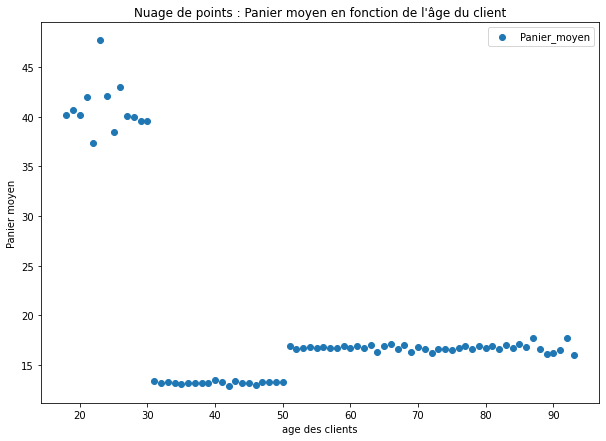

In [31]:
df_moyen_age = df_conso[['client_id','age','price']]
df_moyen_age = df_moyen_age.groupby(['age']).mean().reset_index()
df_moyen_age = df_moyen_age.sort_values('price')
df_moyen_age = df_moyen_age.loc[df_moyen_age['price']<6000, :] #On enleve les outliers pour plus de visibilité

x = df_moyen_age['age']
y = df_moyen_age['price']


fig = plt.figure(1, figsize = (10,7))
plt.scatter(x , y, label = 'Panier_moyen' )
plt.title("Nuage de points : Panier moyen en fonction de l'âge du client")
plt.xlabel('age des clients')
plt.ylabel('Panier moyen')
plt.legend()
plt.show()

**Analyse :** <br>
Le panier moyen pour les moins de 30 ans se situe au alentour de 40€ <br>
Les 30-50 est de 13€. <br>
Les plus de 50 ans ont une moyenne d'achat de 17€.

### TEST Khi2 (Corrélation entre deux variables qualitatives)

#### Tableau de Contingence

In [32]:
df_sex_categ = pd.crosstab(df_conso['sex'], df_conso['categ'])
print(df_sex_categ)

categ       0       1      2
sex                         
f      205851  114759  17256
m      209159  112132  19127


In [33]:
Khi2_obs, p_value, dd1, effectif_theorique = chi2_contingency(df_sex_categ)
print("Le khi2 est de :", Khi2_obs)
print("Le p_value est de :", p_value)
print("Le dd1 est de :", dd1)
print("Le effectif théorique est de :", effectif_theorique)

Le khi2 est de : 143.40045211735296
Le p_value est de : 7.260850110798997e-32
Le dd1 est de : 2
Le effectif théorique est de : [[206724.2757606  113018.66859015  18123.05564926]
 [208285.7242394  113872.33140985  18259.94435074]]


**INTERPRETATION :** <br>
Dans ces résultats, la statistique du Khi deux est de 143.40 et la valeur de p = 7.260850110798997e-32. Avec un seuil de signification de 0,05, vous pouvez donc conclure que l'association entre les variables sexe et catégorie est statistiquement significative.

### TEST SPEARMAN ( Corrélation entre deux variables quantitative)

#### Pour savoir si j'utilise un test paramétrique ou non l'analyse statistique, j'utilise le test de normalité de "Shapiro_Wilk" 

Hypothèse nulle selon laquelle un échantillon est issu d'une population normalement distribuée. 

In [34]:
df_frequence = df_conso[['session_id','age']]
df_frequence= df_frequence.groupby('age').count()
x = df_frequence.index
y = df_frequence['session_id']

In [35]:
stat, p_val = stats.shapiro(y)
print('La P_value est de : ', p_val, ' ,')
print('soit ' f'{p_val:.30f} ')
print('et le test statistic est de : ', round(stat,5))

La P_value est de :  8.640623860856067e-08  ,
soit 0.000000086406238608560670400038 
et le test statistic est de :  0.83382


Comme le P_value est inférieure à un niveau alpha choisi (ici 0.05), alors l'hypothèse est rejetée.<br>
Nous devons donc choisir un test non paramétrique pour le tester la correlation des 2 variables

#### J'utilise donc le test de corrélation de "Spearman"

HYPOTHESES : <br>
    H0 = Il n'y a pas corrélation, la fréquence des achats ne correspond pas à l'âge du client.<br>
    H1 = Il y a corrélation, la fréquence d'achats correspond à l'âge du client.<br>

In [36]:
ind_corr ,p_val = stats.spearmanr(x,y)
print('La P_value est de : ', p_val, ',')
print('soit ' f'{p_val:.30f} ')
print('et le coefficient de corrélation est de : ', round(ind_corr,5))

La P_value est de :  1.0361187752760396e-11 ,
soit 0.000000000010361187752760396330 
et le coefficient de corrélation est de :  -0.68334


**Analyse :** <br>
La P_value étant inférieure à la valeur référence de 0.05, l'hypothèse H0 est donc rejetée !<br>
Il y a bien corrélation ! <br>
Le coefficient de corrélation est de -0.68334 nous montre que la corrélation est forte et négative. <br>
**Plus les clients sont agés moins ils font des achats fréquents.**

### TEST DE STUDENT (Comparaison de deux échantillons)

In [37]:
stat1, p_value1 = stats.ttest_ind(x,y)
print('La P_value est de : ', p_value1, ',')
print('soit ' f'{p_value1:.40f} ')
print('et le test statistique est de : ', round(stat1,5))


stat2, p_value2 = stats.ttest_rel(x,y) ;
print('La P_value est de : ', p_value2, ',')
print('soit ' f'{p_value2:.40f} ')
print('et le test statistique est de : ', round(stat2,5))

La P_value est de :  1.6060261917599265e-15 ,
soit 0.0000000000000016060261917599264761651219 
et le test statistique est de :  -8.90868
La P_value est de :  2.341379278526571e-13 ,
soit 0.0000000000002341379278526571098207264622 
et le test statistique est de :  -8.89661


Le test de Student permet de comparer deux échantillons.

Il va estimer la probabilité que la différence entre ces deux échantillons soit due au hasard (la p-value).

Plus la p-value est petite, plus l'intervention du hasard est peu probable et la différence certaine. Le seuil habituel est de 0.05 mais est empirique...

